# Peformance

This notebook shows the training and test performance obtain across different experiments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
exp_name = "gru_006"
print(os.listdir(os.path.join(exp_name,"metrics")))

['version_0', 'version_1']


In [3]:
pathfile = os.path.join(exp_name,"metrics","version_1","metrics.csv")
df = pd.read_csv(pathfile)
df.head(15)

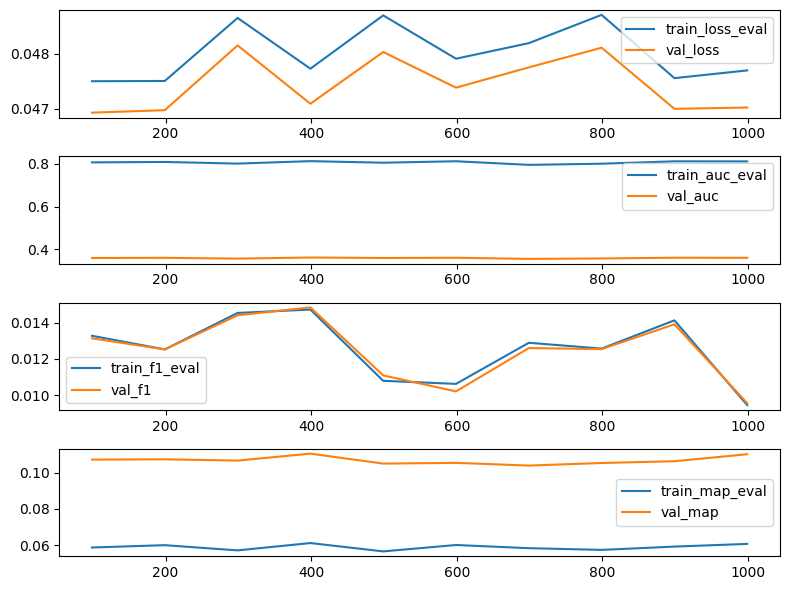

In [5]:
plt.figure(figsize=(8, 6))
plt.subplot(411)
x, y = df["epoch"], df["train_loss_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_loss_eval")
x, y = df["epoch"], df["val_loss"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_loss")
plt.legend()

plt.subplot(412)
# plt.plot(df["epoch"], df["val_auc"], label="val_auc")
x, y = df["epoch"], df["train_auc_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_auc_eval")
x, y = df["epoch"], df["val_auc"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_auc")
plt.legend()

plt.subplot(413)
# plt.plot(df["epoch"], df["val_f1"], label="val_f1")
x, y = df["epoch"], df["train_f1_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_f1_eval")
x, y = df["epoch"], df["val_f1"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_f1")
plt.legend()

plt.subplot(414)
# plt.plot(df["epoch"], df["val_map"], label="val_map")
x, y = df["epoch"], df["train_map_eval"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x[1:], y[1:], label="train_map_eval")
x, y = df["epoch"], df["val_map"]
x = x[y.notna()]
y = y[y.notna()]
plt.plot(x, y, label="val_map")
plt.legend()

plt.tight_layout() 